In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def split(data, test_size=20):
    return data[:-test_size], data[-test_size:]

# Uogólniony model liniowy
Zbiór metod, który jest używany w regresji, w których można się spodziewać, że wartość docelowa jest liniową kombinacją wartości wejściowych.

$$\hat{y}(w,x)=w_0 + w_1 x_1 + ... + w_p x_p$$
Gdzie współczynnik (coeficient) oznaczany jest przez $w = (w_1, ..., w_p)$, a współczynnik jako $w_0$.


Optymalna liczba obserwacji do badania regresji to $n>50+k*15$. Dobrze przeprowadzona regresja pozostawia tylko obserwacje (które nie załapały się w analizie) będące szumem.

### Ordinary Least Squares (metoda najmniejszych kwadratów)
Regresja liniowa dopasowuje model opisany współczynnikami $w = (w_1, ..., w_p)$, która stara się minimalizować sumę kwadratów różnic pomiędzy oczekiwanymi, a wartościami będącymi wynikiem liniowej aproksymacji. Z matematycznego punktu widzenia rozwiązujemy problem:
$$\min_{w} ||Xw-y||^2$$

Współczynniki:  [ 938.23786125]
Średni błąd kwadratowy: 2548.07239873


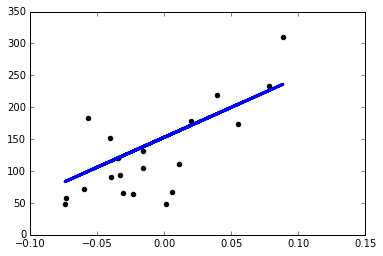

In [4]:
from sklearn import datasets, linear_model

#wczytanie przykładowych danych
diabetes = datasets.load_diabetes()
#użycie tylko jednego feature
diabetes_X = diabetes.data[:, np.newaxis, 2]
#rozdzielamy dane na dane do trenowania i testowania
diabetes_X_train, diabetes_X_test = split(diabetes_X, 20)
diabetes_y_train, diabetes_y_test = split(diabetes.target, 20)
#tworzymy model regresji liniowej i dopasowujemy go do danych
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)
#obliczone współczynniki
print 'Współczynniki: ', regr.coef_
#błąd predykcji
print "Średni błąd kwadratowy:", np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2)
#narysowanie wykresu
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue', linewidth=3)

## Ridge regression (Regresja grzbietowa)
Regresja grzbietowa dotyczy tego samego problemu co OLS, ale wprowadza dodatkową regularyzację w zależną od wielkości współczynników.
$$\min_{w} ||Xw-y||^2 + \alpha||w||^2$$
Gdzie $\alpha\geq 0$ jest parametrem złożoności, który kontroluje stopień pomniejszenie: wysoka wartość $\alpha$ oznacza duże zmniejszenie współczynników, a przez uzyskujemy silniejszą współliniowość.
Regresja grzbietowa jest metodą radzenia sobie ze skorelowanymi zmiennymi (albo z dużą ilością zmiennych). Metoda ta redukuje wariancję estymatorów, aczkolwiek kosztem obciążenia.

Współczynniki:  [ 458.48859467]
Średni błąd kwadratowy: 3604.26963262


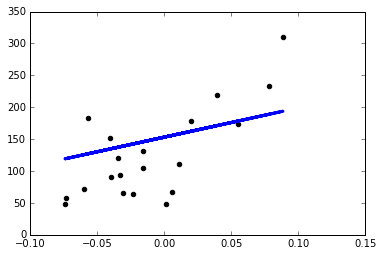

In [5]:
from sklearn import datasets, linear_model

#wczytanie przykładowych danych
diabetes = datasets.load_diabetes()
#użycie tylko jednego feature
diabetes_X = diabetes.data[:, np.newaxis, 2]
#rozdzielamy dane na dane do trenowania i testowania
diabetes_X_train, diabetes_X_test = split(diabetes_X, 20)
diabetes_y_train, diabetes_y_test = split(diabetes.target, 20)
#tworzymy model regresji grzbietowej i dopasowujemy go do danych
regr = linear_model.Ridge()
regr.fit(diabetes_X_train, diabetes_y_train)
#obliczone współczynniki
print 'Współczynniki: ', regr.coef_
#błąd predykcji
print "Średni błąd kwadratowy:", np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2)
#narysowanie wykresu
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue', linewidth=3)

## Lasso
Metoda Lasso to model liniowy, który pozwala na estymacje rzadkich współczynników. Jest przydatna zwłaszcza w rozwiązywaniu problemów, gdzie preferowane rozwiązanie ma mniej parametrów. Metoda ta redukuje sięc liczbę zmiennych, od których rozwiązanie jest zależne. Metoda ta jest szczególnie istotna w dziedzinie Compressed sensing (sparse sampling).

Współczynniki:  [ 894.0809961]
Średni błąd kwadratowy: 2602.57158298


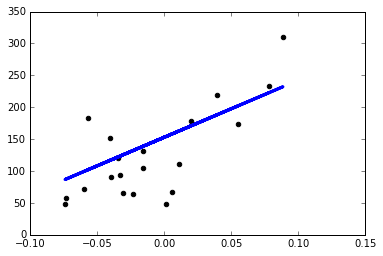

In [6]:
from sklearn import datasets, linear_model

#wczytanie przykładowych danych
diabetes = datasets.load_diabetes()
#użycie tylko jednego feature
diabetes_X = diabetes.data[:, np.newaxis, 2]
#rozdzielamy dane na dane do trenowania i testowania
diabetes_X_train, diabetes_X_test = split(diabetes_X, 20)
diabetes_y_train, diabetes_y_test = split(diabetes.target, 20)
#tworzymy model regresji Lasso i dopasowujemy go do danych
regr = linear_model.Lasso(alpha = 0.1)
regr.fit(diabetes_X_train, diabetes_y_train)
#obliczone współczynniki
print 'Współczynniki: ', regr.coef_
#błąd predykcji
print "Średni błąd kwadratowy:", np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2)
#narysowanie wykresu
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue', linewidth=3)

## Regularyzacja L1, L2, Lp
Wyobraźmy sobie piłkę $lp$. Wraz z obniżeniem wartości p, wielkość odpowiadającego wymiaru $lp$ również maleje.

![alt text](l1l2.png "Wymiary regularyzacji")
![alt text](regular.png "Wymiary regularyzacji")

### Predykcja L1 a L2
Zazwyczaj koszt grzbietu (ridge) albo $l2$ są znacznie lepsze w minimalizowaniu błędu predykcji niż koszty $l1$.Jest tak ponieważ, gdy dwa predyktory są wysoce skorelowane, regularyzacja $l1$ wybierze jeden z dwóch predyktorów. Z kolei regularyzacja typu $l2$, zachowa oba i w odpowiedni sposób obniży współczynniki. Tak więc mimo, że $l1$ może pomóc zredukować problem przeuczenia, to przy okazji może spowodować pogorszenie jakości dokonywanych predykcji.

## Elastic Net
Algorytm ElasticNet to model regresji liniowej, który używa zarówno regularyzacji typu $l1$ i $l2$. Taka kombinacja pozwala na uczenie rzadkich modeli, gdzie tylko część współczynników jest niezerowa (jak w Lasso), ale przy tym zachoduje własności regularyzacji z regresji grzbietowej (ridge).
ElasticNet jest przydatny w sytuacjach, gdy mamy wiele, skorelowanych ze sobą zmiennych. Lasso wybierze jedną z nich (np. w sposób losowy), podczas gdy ElasticNet wybierze oba.

# Regresja logistyczna (logistic regression)

Regresja logistyczna, pomimo swojej nazwy, jest liniowym modelem klasyfikacji, a nie regresji. W literaturze nazywana jest też czasami regresją logit, klasyfikacja maximum-entropy (MaxEnt) albo klasyfikatorem log-linear. W tym modelu, prawdopodobieństwo opisujące możliwe rezultaty pojedyńczej próby jest opisane przy pomocy funkcji logistycznej i pojęcia szansy. Uczenie modelu regresji logistycznej często sprowadza się do optymalizacji (maksymalizacji) wartości funkcji:
$$log L(X_1, ..., X_n, \beta) = \sum_{i=1}^{n}(Y_i   log (p(X_i)) + (1-Y_i) log (1-p(X_i))).$$

### Funkcja logistyczna
Funkcja logistyczna (logistic curve, sigmoid curve) to funkcja definiowana wzorem:
$$f(x) = \frac{L}{1+e^{-k(x-x_0)}}$$
gdzie:
 - $e$ to liczba Eulera
 - $x_0$ definiuje środek krzywej
 - $L$ maksymalna wartość, którą może przyjąć funkcja
 - $k$ stromość krzywej

### Szansa
Szansa (odds) jest to funkcja prawdopodobieństwa, która zamiast wyliczania klasycznego prawdopodobieństwa (stosunek sukcesu do wszystkich prób) wylicza stosunek prawdopodobieństwa sukcesu do prawdopodobieństwa porażki.
$$o = \frac{p}{1-p}$$
$$p = \frac{o}{1+o}$$
gdzie
$o$ - szansa
$p$ - prawdopodobieństwo sukcesu

In [7]:
def plot_mesh(X, Y, classifier):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min = X[:, 0].min() - 0.5
    x_max = X[:, 0].max() + 0.5
    y_min = X[:, 1].min() - 0.5
    y_max = X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
def plot_scatter(X, Y):
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)

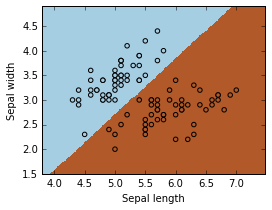

In [8]:
from sklearn import linear_model, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target
X = X[Y != 2]
Y = Y[Y != 2]

logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X, Y)

plt.figure(1, figsize=(4, 3))
plot_mesh(X, Y, logreg)
plot_scatter(X, Y)


plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

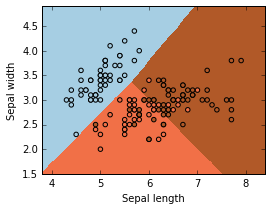

In [9]:
from sklearn import linear_model, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X, Y)

plt.figure(1, figsize=(4, 3))
plot_mesh(X, Y, logreg)
plot_scatter(X, Y)


plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

### Funkcja strat (ang. loss function)
Funkcja strat określa, jaki poniewiemy koszt, gdy podejmiemy decyzję d, a prawdziwy parametr będzie miał wartość $\theta$.
Przykład funkcji:
$$L(d,\theta) = |d-\theta|$$
$$L(d,\theta) = (d-\theta)^2$$
$$L(d,\theta) = -\delta(d-\theta)$$

### Uczenie dyskryminatywne (Discriminative learning)
Modele dyskryminatywne opisują granice pomiędzy klasami. Opisane są poprzez prawdopodobieństwo warunkowe (conditional probabilty). Pozwalają na klasyfikację punktów, bez określenia modelu, który opisuje w jaki sposób te punkty zostały wygenerowane. Modele dyskryminatywne osiągają często lepsze wyniki niż generatywne, ale są trudniejsze do wyuczenia. Kluczowym pojęciem w modelach dyskryminatywnych jest granica (**boundary**).

### Uczenie generatywane (Generative learning)
Modele generatywne opisują rozkład pojedyńczej klasy. Opisywane są przez wspólny rozkład prawdopodobieństwa (joint probabilty). Generatywne modele zakładają istnienie struktury opisywanych danych.
Modele generatywne są zazwyczaj bardziej elastyczne od dyskryminatywnych. Łatwiej się też je uczy, ale w praktyce osiągają często gorsze wyniki niż modele dyskryminatywne. Kluczowym pojęciem w modelach dyskryminatywnych jest rozkład (**distribution**).


### Porównanie:    
![alt text](dyskgen.png "Porówanianie uczenia generatywnego i dyskrymiatywnego")

## Regresja wielomianowa (polynomial regression) 
Regresja wielomianowa pozwala na rozszerzenie modelu liniowanego przy użyciu funkcji bazowych (basic functions).
Jednym z popularnych wzorców w zagadnieniach uczenia maszynowego jest trenowanie nieliniowych funkcji przy pomocy liniowego modelu. To podejście za zwyczaj zachowuje szybkość działania i wydajność liniowego modelu, ale pozwala na modelowanie bardziej zróżnicowanych danych.

Na przykład, prosta regresja liniowa może być rozszerzona poprzez zastosowanie wielomianowych cech (features). W standardowej regresji liniowej przykładowa funkcja ma postać:
$$\hat{y}(w,x)=w_0 + w_1 x_1 + w_2 x_2$$
Jeżeli chcielibyśmy dopasować nasz model do parabolidu (paraboli w 3 wymiarach) zamiast do płaszczyzny (prostej w 3 wymiarach), możemy użyć wielomianu drugiego rzędu. Wtedy funkcja opisująca model wyglądałaby tak:

$$\hat{y}(w,x)=w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2$$

Zaskakującą obserwacją może być fakt, że tak zdefiniowany model cały czas jest liniowy. By lepiej to zrozumieć wystarczy wyobrazić sobie nową zmienna, opisaną przez wektor:
$$z = [x_1, x_2, x_1 x_2, x_1^2, x_2^2]
Po zaaplikowaniu nowej zmiennej do poprzedniego problemu otrzymamy:


$$\hat{y}(w,x)=w_0 + w_1 z_1 + w_2 z_2 + w_3 z_3 + w_4 z_4 + w_5 z_5$$

Widzimy więc, że wielomianowa regresja opisuje tą samą klasę liniowych modeli, które opisane były powyżej i może być rozwiązana w ten sam sposób. 

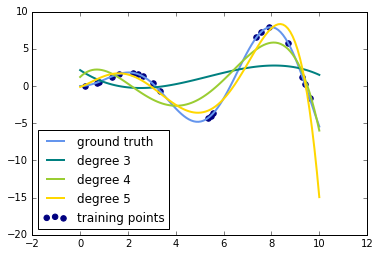

In [18]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()

# Kernelowa regresja grzbietowa (Kernel ridge regression)
Model kernelowa regresja grzbietowa łączy w sobie regresje grzbietową (ridge regression, bazującą na liniowej metodzie najmniejszych kwadratów razem z regularyzacją typu l2) oraz trickiem kernelowym (kernel trick). Tak więc uczy ona przestrzeń liniową, która była przekształcona wedługo zastosowanego kernela. Dla nieliniowych kerneli, odpowiada ona nieliniowej funkcji w oryginalnej przestrzeni.

Forma modelu wyuczonego kernelową regresję grzbietową jest podobny do tego stworzonego przez regresje wektorów nośnych (support vector regression). Różnicą jest funkcja kosztu (loss function), która w przypadku KRR jest funkcją kwadratowego błęd. W przypadku SVR używana jest funkcja niewrażliwa na $e$. Ale obie używają regularyzacji typu l2. W przeciwieństwie do SVR, uczenie Kernelowej regresji grzbietowej jest szybsze na danych średniej wielkośći, ale stworzony model nie jest rzadki (a tym samym wolniejszy niż SVR).

# Maszyny wektorów nośnych (Support vector machines, SVMs)
Maszyny wektorów nośnych są zbiorem metod uczenia nadzorowanego używanych w klasyfikacji, regresji i outliers detection.

Zalety tych metod to między innymi:
- wydajność w wysokichwymiarach
- działają nawet w sytuacjach, gdzie liczba wymiarów jest wyższa niż liczba przykładów
- jest wydajna pamięciowo - funkcja decyzji używa wektorow nośnych, będących punktami ze zbioru trenującego
- wszechstronne - w zależności od potrzeby można wybrać inną funkcję kernelową

Do wad maszyn wektorów nośnych można zaliczyć:
- jeżeli liczba wymiarów jest dużo większa niż wielkość zbioru uczącego, metody te będą działać słabo
- SVMs nie dostarczają w sposób bezpośredni szacowanego prawdopodobieństwa. Można je wyliczyć używając kosztownego "five-fold cross-validation"

## Klasyfikacja

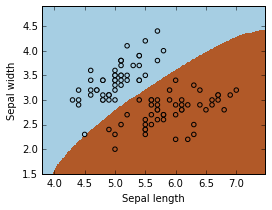

In [10]:
from sklearn import svm

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

X = X[Y != 2]
Y = Y[Y != 2]

clf = svm.SVC(kernel="rbf", degree=3)
clf.fit(X, Y)

plt.figure(1, figsize=(4, 3))
plot_mesh(X, Y, clf)
plot_scatter(X, Y)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

W klasyfikacji wielu klas przy użyciu metody SVC używa się metody "one-against-one". Tworzone jest $N*\frac{(N-1)}{2}$ klasyfikatorów dla $N$ klas.

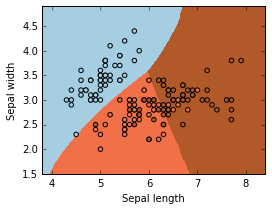

In [11]:
from sklearn import svm

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

clf = svm.SVC(kernel="rbf", degree=10)
clf.fit(X, Y)

plt.figure(1, figsize=(4, 3))
plot_mesh(X, Y, clf)
plot_scatter(X, Y)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

### Oceny i prawdopodobieństwo
SVMs nie dostarczają w sposób bezpośredni szacowanego prawdopodobieństwa. Można je wyliczyć wykonując kosztowne obliczenia. Dla przypadku binarnego, prawdopodobieństwa obliczane są przy pomocy skalowania Platt'a (Platt scaling). Algorytm bazuje na regresji logistycznej, która jest obliczona na ocenach obliczonych przez SVM i dodatkowo dopasowana przy pomocy cross-validation na zbiorze treningowym. Algorytm można też rozszerzyć na więcej niż dwie klasy, ale jest to dużo bardziej złożone.
Cross-validation, która jest częścia skalowania Platta, jest bardzo złożoną operacją zwłaszcza dla dużego zbioru danych. Co więcej, obliczone prawdopodobieństwa mogą nie idealnie odwzorowywać oceny obliczone SVM. Może się zdarzyć sytuacja, że argmax dla prawdopodobieństw nie jest taki sam jak argmax dla ocen.

### Niezbalansownych problemach
W przypadku gdy dane są niezbliansowane możemy zastosować rozwiązanie, w którym jedna z klas (albo niektóre z elementów zbioru testującego) była preferowana podczas uczenia SVM. Aby osiągnąć taki efekt można rozszerzyć algorytm uczący SVM o wagi.

![alt text](notbalanced.png "Niezbalansowane dane")

### Skalowanie danych wejściowych
Algorytm SVM nie skaluje się w nieskończoność. Jeżeli to możliwe to powinno się skalować danę przy pomocy odpowiedniego preprocessingu. Na przykład, dobrym rozwiązaniem jest sprowadzenie wszystkich zmiennych wejściowego wektora do liczb z przedziału [0, 1], albo [-1, +1]. Albo ustandaryzowanie ich tak by średnia próbki wynosiła 0, a wariancja 1.

### Popularne fukcje kernelowe
- liniowa $\langle x, x'\rangle$
- wielomianowa $(\gamma \langle x, x'\rangle + r)^d r$
- rbf $exp(-\gamma |x- x'|^2) \gamma$
- sigmoid $tanh(\gamma \langle x, x'\rangle +r)$

### Metoda gradient stochastycznego (Stochastic Gradient Descent)
Metoda gradientu stochastycznego to prosta, ale bardzo wydajna metoda w uczeniu dyskryminatywnym dla liniowych klasyfikatorów. Sprawdza się zwłaszcza w metodach używającej wypukłej (convex) funkcji strat takich jak (liniowe) Support Vector Machines albo Regresja Logistyczna.
Mimo, że metoda ta była używana już od dawna, to ostatnimi czasy znowu stała się popularna w kontekscie uczenie maszynowego dużej skali.

Metoda gradientu prostego była z powodzeniem aplikowana do uczenia dużej skali oraz problemów gdzie dane można określić jako "rzadkie". Kiedy dostarczane dane są rzadkie, klasyfikatory używające tej metody z łatwością skalują się do problemów z $10^5$  elementów trenujących i ponad $10^5$ cech (features).
Jest często używana w problemach klasyfikacji tekstu i przetwarzania naturalnego języka.

Główne zalety metody gradientu stochastycznego:
- Wydajność
- Łatwość implementacji i tuningu

Wady tej metody to między innymi:
- Wymagane jest zdefiniowanie parametrów takich jak: regularyzacja i liczba iteracji
- Metoda jest wrażliwa na skalowanie cech.


# Sprawdzian krzyżowy (Cross-validation)
Jest to metoda statystyczna, polegająca na podziale próby statystycznej na podzbiory, a następnie przeprowadzaniu wszelkich analiz na niektórych z nich (zbiór uczący), podczas gdy pozostałe służą do potwierdzenia wiarygodności jej wyników (zbiór testowy, zbiór walidacyjny).

## Rodzaje 

### Prosta walidacja
Jest to najbardziej typowy rodzaj walidacji, w którym próbę dzieli się losowo na rozłączne zbiory: uczący i testowy. Zwykle zbiór testowy stanowi mniej niż 1/3 próby. Niektórzy nie zaliczają tego typu walidacji do metody sprawdzianu krzyżowego.

### K-krotna walidacja
W tej metodzie, oryginalna próba jest dzielona na K podzbiorów. Następnie kolejno każdy z nich bierze się jako zbiór testowy, a pozostałe razem jako zbiór uczący i wykonuje analizę. Analiza jest więc wykonywana K razy. K rezultatów jest następnie uśrednianych (lub łączonych w inny sposób) w celu uzyskania jednego wyniku.

### Leave-one-out
Jest to odmiana walidacji K-krotnej, gdy N-elementowa próba jest dzielona na N podzbiorów, zawierających po jednym elemencie. Stosowana często dla małych zbiorów danych.

# Wybór cech (feature selection)
## Zalety
Jedne z trzech głównych zalet stosowania metod feature selection przed rozpoczęciem modelowania danych są:
- Zmniejszenie problem przemuczenia (overfitting) - mniej redundantnych danych poprawia jakość modelu i sprawia, że decyzje nie są podejmowane w oparciu o szum.
- Większenie dokładności - mniej mylących danych poprawia jakość modelu
- Zmniejszenie czasu uczenia - mniej danych oznacza, że algrorytm uczy się szybciej


## Algorytymy

### Usuwanie cech o niskiej wariancji
Jest to prosta (baseline) metoda, która polega an usunięciu wszystkich cech, których wariancja nie przekroczyła pewnego ustalonego progu. Przykładowo, jeżeli pewna cecha przyjmuje taką samą wartość we wszystkich próbkach, to jej wariancja jest równa zero. Wtedy wiemy, że taka próka nie wnosi nowej informacji do modelu.

### Jednoczynnikowy wybór cech (univariate feature selection)
Jednoczynnikowy wybór cech to algorytm, w którym wybiera się cechy, które otrzymują najlepszy wynik w pewnym jednoczynnikowym teście statystycznym. Na przykład używając jednoczynnikowej analizy wariancji (np test F) badamy czy dana cecha ma wpływ na modelowaną zmienną zależną. W takiej analizie przyjmuje się, że wartości cechy dzielą się na grup różniących się między sobą pod względem wartości tej cechy. Takie metody mogą uchwycić dowolny rodzaj statystycznej zależności, ale ponieważ są nieparametryczne, to wymagają większej liczby próbek to uzyskania dokładnej estymacji.

### Algorytm zachłanny
Algorytm bazuje na testach LOOCV (leave one out cross validation). Rozpocznij od obliczenia LOOCV dla każdego atrybutu. Następnie wybierane są najlepsze atrybuty. Zaczynamy od pojedyńczego elementu, do którego dobierane są kolejne, tak długo jak kolejny atrybut poprawia wynik LOOCV.

# Gaussian mixture models
Model gaussian mixture models to model probabilistyczny, który zakłada, że punkty wygenerowany zostały jako mieszanka skończonej liczby rozkładów Gaussowskich z nieznanymi parametrów. Metoda ta może być rozumiana jako uogólniony model grupowania k-means, który dodatkowo uwzględnia informację o kowariancji.

## Implementaja metodami expectation-maximization
Implementacja tego modelu bardzo często oparta jest na metodzie expectation-minimization.


Automatically created module for IPython interactive environment


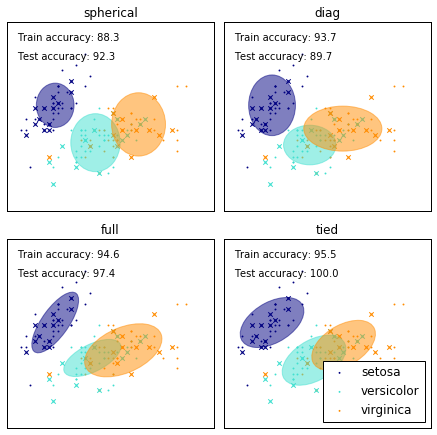

In [52]:

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

print(__doc__)

colors = ['navy', 'turquoise', 'darkorange']


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)

iris = datasets.load_iris()

# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(iris.data, iris.target)))


X_train = iris.data[train_index]
y_train = iris.target[train_index]
X_test = iris.data[test_index]
y_test = iris.target[test_index]

n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = dict((cov_type, GaussianMixture(n_components=n_classes,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=iris.target_names[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()

# Grupowanie (clustering)
Zwane też również analizą skupień. Metody te dzielą dane na grupy, które są sensowne (meaningful) lub użyteczne. Grupy powinny odzwierciedlać naturalną strukturę danych. 

### Grupowanie możę być używane do różnych celów:
- do zrozumienia charakterystyki danych
- do sumaryzacji albo kompresji danych
- do klasyfikacji (grupowanie jest nazywane czasami unsupervised classification)

## Różne typy grupowana:
### Hierarchiczne, a podziałowe (Hierarchical vs Partitional)
Najpopularniejszy podział pomiędzy metodami grupowania:
- Grupowanie podziałowe służy do prostego podzielenia danych na nienachodzące na siebie grupy, w taki sposób, że każdy obiekt jest w dokładnie jednej grupie.
- Grupowanie hierarchiczne zakłada możliość istnienia podgrup, które są zagnieżdżone w grupach. W grupowaniu hierarchicznym, struktura grup przyjmuje postać drzewa, w którym korzeń drzewa jest grupą zawierającą wszystkie elementy.

### Pojedyńcze, nachodzące, a rozmyte (Exclusive vs Overlapping vs Fuzzy)
- W grupowaniu pojedyńczym, każdy element może należeć do dokładnie jednej grupy
- W grupowaniu nachodzącym, każdy element może należeć do więcej niż jednej gurpy
- W grupowaniu rozmytym, każdy elementem ma przypisany stopień przynależności do grupy, który przyjmuje wartość od 0 do 1.

### Całkowite, a częściowe (Complete vs Partial)
- Całkowite grupowanie to takie w którym każdy obiekt jest przypisany do jakiejś grupy
- W grupowaniu częściowym nie każdy obiekt musi być przypisany do jakieś grupy

## Typy grup
Powstało kilka różnych notacji określających typy zbiorów:

![alt text](clusters.png "Typy grup")

## Hierarchiczne grupowanie
W hierarchicznym grupowaniu istnieje podział definiujący ogólną zasadę działania algorytmów na grupowanie aglomeracyjne (agglomerative0 i podziałowe (divisive):
- grupowanie aglomeracyjne rozpoczyna swoje działanie od indywidualnych grup, dka każdego z punktów osobno. W następnych krokach łączone są ze sobą najbliższe grupy.
- grupowanie podziałowe rozpoczynamy od stworzenia jednej, wspólnej grupy dla wszystkich elementów. W następnych krokach dzielimy grupy, tak długo aż grupa nie będzie się składać tylko z jednego elementu. Kluczowym problemem algorytmach tego typu jest kiedy zaprzestać podział.

## Algorytmy
### k-średnich (k-means)
Algorytm k-średnich to podstawowy algorytm grupowania. Działanie algorytmu rozpoczynamy od wybrania K początkowych centroidów, gdzie K to określona przez użytkownika liczba porządanych grup. W kolejnym kroku każdy z wejściowych punktów przyporządkowujemy do najbliższego centroidu. W ten sposób definiują nam się początkowe grupy. Następnie obliczamy nową wartość centroidu, która jest średnią pozycją wszystkich elementów grupy. Powtarzamy tę czynność dopóki zmiany w grupach nie ustaną.

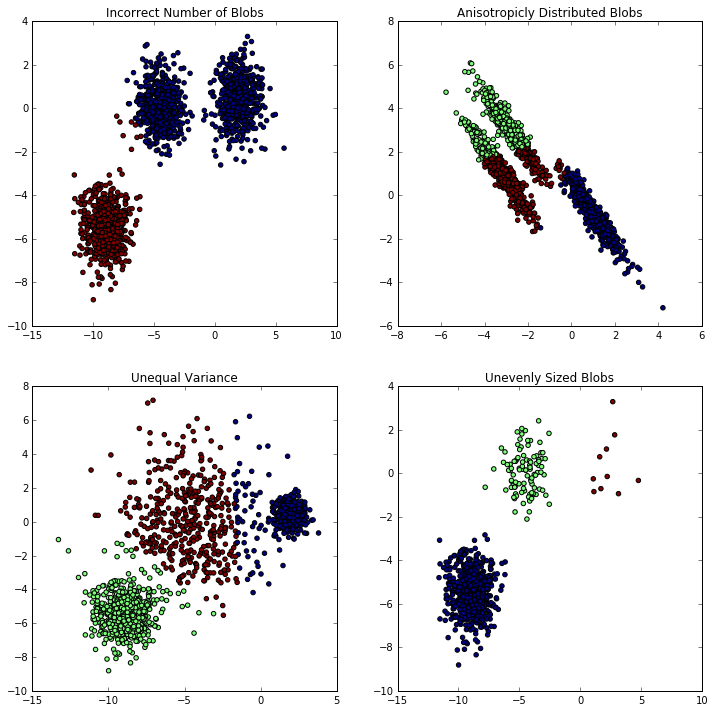

In [22]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[ 0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

### Algorytm aglomeracyjnego, hierarchicznego grupowania
Algorytm ten działa w oparciu o macierz bliskości zbiorów. Zaczynamy pracę algorytmu od zdefiniowania indywidualnych grup dla każdego z elementów. Następnie obliczmy macierz bliskości grup i łączymy ze sobą dwa najbliższe. Algorytm powtarzamy aż nie zostanie tylko jedne grupa.

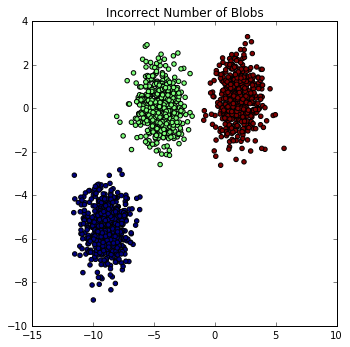

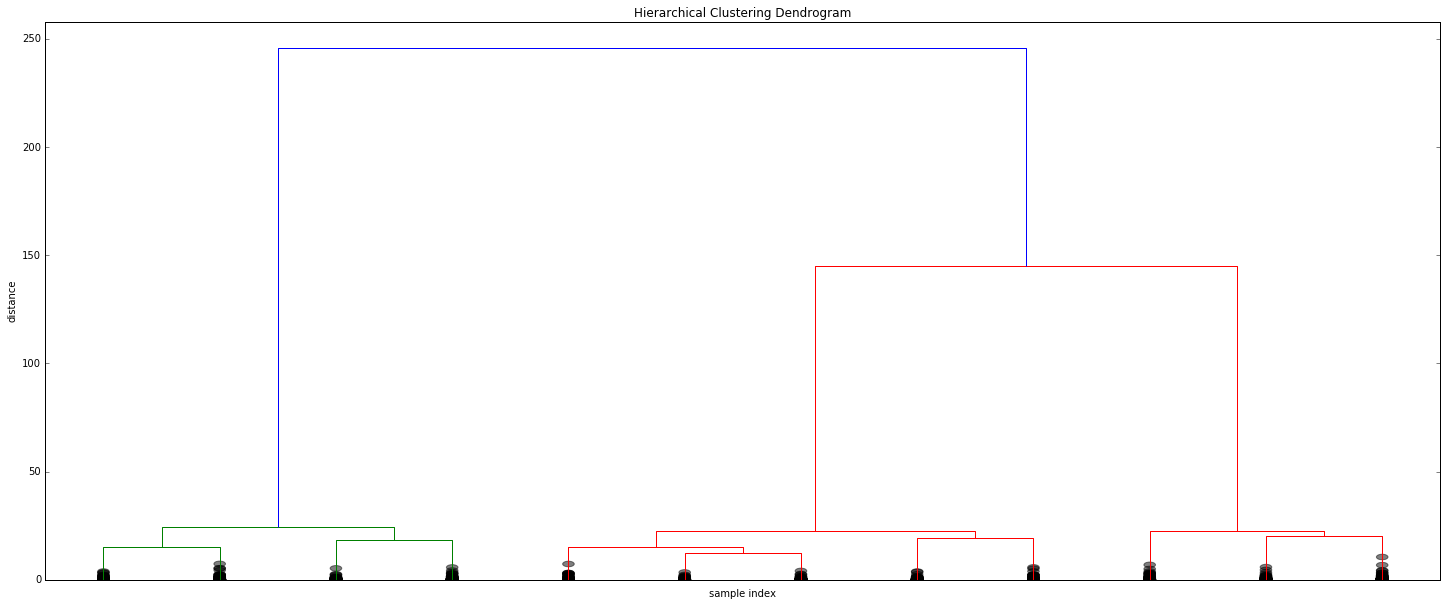

In [35]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = AgglomerativeClustering(n_clusters=3).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")
plt.show()

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,    
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

## Grupowanie spektralne (spectral clustering)
Algorytmy grupowania widmowego pozwalają na grupowanie danych, których struktura nie jest wypukła (non-convex). A mówiąc bardziej ogólnie, pozwalają na modelowanie danych, których centrum i rozkład nie są odpowiednimi miarami opisującymi grupy.

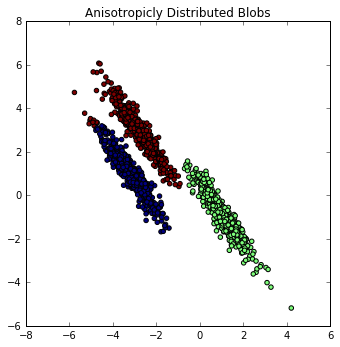

In [38]:
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Anisotropicly distributed data
transformation = [[ 0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

spectral = SpectralClustering(n_clusters=3,
                                          eigen_solver='arpack',
                                          affinity="nearest_neighbors")
y_pred = spectral.fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

plt.show()

# TODO

http://scikit-learn.org/stable/modules/outlier_detection.html#outlier-detection
http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
    

# Ensemble learning
Uczenie typu ensemble polega na stworzeniu kombinacji wielu modeli w celu rozwiązania pojedyńczego problemu predykcji. Metoda ta polega na stworzeniu wielu niezależnych modeli/klasyfikatorów. Ostateczna predykcja jest wypadkową predykcji stworzonych na podstawie pomniejszych modeli.

## Random tree forests

In [2]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

train, test = df[df['is_train']==True], df[df['is_train']==False]

features = df.columns[:4]
clf = RandomForestClassifier(n_jobs=2)
y, _ = pd.factorize(train['species'])
clf.fit(train[features], y)

preds = iris.target_names[clf.predict(test[features])]
pd.crosstab(test['species'], preds, rownames=['actual'], colnames=['preds'])

preds,setosa,versicolor,virginica
actual,,,
setosa,12,0,0
versicolor,0,13,0
virginica,0,2,16
